In [1]:
from exif import Image

In [2]:
import os

In [4]:
d = os.getcwd()
print(d)

/home/andrewcgaitskell/Documents/Code


In [6]:
with open('/home/andrewcgaitskell/Documents/Code/Images/DiceYDominoes/1/P1020934.jpeg', 'rb') as image_file:
  my_image = Image(image_file)

In [7]:
 my_image.has_exif

True

In [8]:
listofattributes = my_image.list_all()

In [9]:
for x in listofattributes:
  print(x)
  try:
    print(my_image[x])
  except:
    print("Not available")


make
Panasonic
model
DMC-FZ45
orientation
Orientation.TOP_LEFT
x_resolution
180.0
y_resolution
180.0
resolution_unit
ResolutionUnit.INCHES
software
Ver.1.0  
datetime
2021:05:21 12:15:47
y_and_c_positioning
2
_exif_ifd_pointer
636
compression
6
jpeg_interchange_format
11764
jpeg_interchange_format_length
2193
exposure_time
0.016666666666666666
f_number
2.8
exposure_program
ExposureProgram.NORMAL_PROGRAM
photographic_sensitivity
400
sensitivity_type
1
exif_version
0230
datetime_original
2021:05:21 12:15:47
datetime_digitized
2021:05:21 12:15:47
components_configuration
Not available
compressed_bits_per_pixel
4.0
exposure_bias_value
0.0
max_aperture_value
3.0
metering_mode
MeteringMode.PATTERN
light_source
LightSource.UNKNOWN
flash
Flash(flash_fired=False, flash_return=FlashReturn.NO_STROBE_RETURN_DETECTION_FUNCTION, flash_mode=FlashMode.COMPULSORY_FLASH_SUPPRESSION, flash_function_not_present=False, red_eye_reduction_supported=False, reserved=0)
focal_length
4.5
maker_note
Not available

In [11]:
import exif
import cv2 ## pip install opencv-python
import numpy as np

# Create a random 2D array within range [0 255]
## image = (np.random.rand(800, 1200) * 255).astype(np.uint8)
image = my_image

# decode to the appropriate format
# jpg -> compressed with information loss)
status, image_jpg_coded = cv2.imencode('.jpg', image)
print('successful jpg encoding: %s' % status)
# tif -> no compression, no information loss
status, image_tif_coded = cv2.imencode('.jpg', image)
print('successful tif encoding: %s' % status)

# to a byte string
image_jpg_coded_bytes = image_jpg_coded.tobytes()
image_tif_coded_bytes = image_tif_coded.tobytes()

# using the exif format to add information
exif_jpg = exif.Image(image_jpg_coded_bytes)
exif_tif = exif.Image(image_tif_coded_bytes)

# providing some information
user_comment = "random image"
software = "created in python with numpy"
author = "Rune Monzel"

# adding information to exif files:
exif_jpg["software"] = exif_tif["software"] = software
exif_jpg["user_comment"] = exif_tif["user_comment"] = user_comment

# show existing tags
print(exif_jpg.list_all())

# save image
with open(r'/home/andrewcgaitskell/Documents/Code/Images/Edited/P1020934.jpg', 'wb') as new_image_file:
    new_image_file.write(exif_jpg.get_file())

In [22]:
import sys
filename = '/home/andrewcgaitskell/Documents/Code/Images/DiceYDominoes/1/P1020934.jpeg'
img = cv2.imread(filename)

In [23]:
from matplotlib import pyplot as plt
import cv2

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


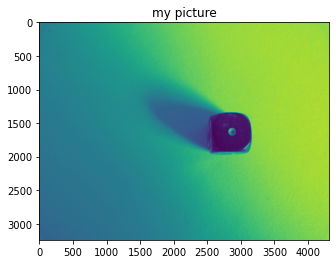

In [24]:
plt.imshow(gray)
plt.title('my picture')
plt.show()

https://twigstechtips.blogspot.com/2014/06/python-reading-exif-and-iptc-tags-from.html

In [25]:
from PIL import Image, ExifTags

tag_name_to_id = dict([ (v, k) for k, v in ExifTags.TAGS.items() ])

# These I got from reading in files and matching to http://www.exiv2.org/tags.html
# You'll have to map your own if something isn't recognised
tag_name_to_id[270] = 'ImageDescription'
tag_name_to_id[306] = 'DateTime'
tag_name_to_id[256] = 'ImageWidth'
tag_name_to_id[257] = 'ImageLength'
tag_name_to_id[258] = 'BitsPerSample'
tag_name_to_id[40962] = 'PixelXDimension'
tag_name_to_id[40963] = 'PixelYDimension'
tag_name_to_id[305] = 'Software'
tag_name_to_id[37510] = 'UserComment'
tag_name_to_id[40091] = 'XPTitle'
tag_name_to_id[40092] = 'XPComment'
tag_name_to_id[40093] = 'XPAuthor'
tag_name_to_id[40094] = 'XPKeywords'
tag_name_to_id[40095] = 'XPSubject'
tag_name_to_id[40961] = 'ColorSpace' # Bit depth
tag_name_to_id[315] = 'Artist'
tag_name_to_id[33432] = 'Copyright'


def convert_exif_to_dict(exif):
    """
    This helper function converts the dictionary keys from
    IDs to strings so your code is easier to read.
    """
    data = {}

    if exif is None:
        return data

    for k,v in exif.items():
       if k in tag_name_to_id:
           data[tag_name_to_id[k]] = v
       else:
           data[k] = v

    # These fields are in UCS2/UTF-16, convert to something usable within python
    for k in ['XPTitle', 'XPComment', 'XPAuthor', 'XPKeywords', 'XPSubject']:
        if k in data:
            data[k] = data[k].decode('utf-16').rstrip('\x00')

    return data

In [28]:
im = Image.open(filename)
im.verify()
print(im.format)

MPO


In [31]:
if im.format in ['JPG', 'TIFF','MPO']:
    exif = convert_exif_to_dict(im._getexif())

    print(exif['DateTime'])

2021:05:21 12:15:47


https://python3-exiv2.readthedocs.io/en/latest/tutorial.html

In [42]:
import pyexiv2 as p

In [43]:
import pyexiv2
meta = pyexiv2.ImageMetadata(filename)
meta.read()

AttributeError: module 'pyexiv2' has no attribute 'ImageMetadata'

https://stackoverflow.com/questions/54229942/how-to-append-keywords-to-iptc-data-in-a-jpg-image

In [44]:
from iptcinfo3 import IPTCInfo
info = IPTCInfo(filename)
print(info['keywords'])


Marker scan hit start of image data
No IPTC data found in /home/andrewcgaitskell/Documents/Code/Images/DiceYDominoes/1/P1020934.jpeg


[]


In [47]:
newfilename = '/home/andrewcgaitskell/Documents/Code/Images/Edited/P1020934.jpeg'

In [48]:
# add keyword
info['keywords'] = ['one']
info.save()
info.save_as(newfilename)

True

In [49]:
info = IPTCInfo(newfilename)
print(info['keywords'])

[b'one']


In [50]:
print(info)

charset:	None
data:	{'supplemental category': [], 'keywords': [b'one'], 'contact': []}


In [52]:
from libxmp import XMPFiles, consts
xmpfile = XMPFiles( file_path=filename , open_forupdate=True )

In [55]:

##Get XMP from file:

xmp = xmpfile.get_xmp()
print(xmp)

<?xpacket begin="﻿" id="W5M0MpCehiHzreSzNTczkc9d"?>
<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Exempi + XMP Core 5.6.0">
 <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
  <rdf:Description rdf:about=""
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:tiff="http://ns.adobe.com/tiff/1.0/"
    xmlns:xmp="http://ns.adobe.com/xap/1.0/"
    xmlns:exif="http://ns.adobe.com/exif/1.0/"
    xmlns:exifEX="http://cipa.jp/exif/1.0/"
    xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/">
   <dc:subject>
    <rdf:Bag>
     <rdf:li>one</rdf:li>
    </rdf:Bag>
   </dc:subject>
   <tiff:Orientation>1</tiff:Orientation>
   <tiff:XResolution>180/1</tiff:XResolution>
   <tiff:YResolution>180/1</tiff:YResolution>
   <tiff:ResolutionUnit>2</tiff:ResolutionUnit>
   <tiff:YCbCrPositioning>2</tiff:YCbCrPositioning>
   <tiff:Make>Panasonic</tiff:Make>
   <tiff:Model>DMC-FZ45</tiff:Model>
   <xmp:CreatorTool>Ver.1.0</xmp:CreatorTool>
   <xmp:ModifyDate>2021-05-21T12:15:47</xmp:Modi

In [58]:
from libxmp import consts
print(consts.XMP_NS_DC)

http://purl.org/dc/elements/1.1/


In [57]:
dc = xmp["http://purl.org/dc/elements/1.1/"]

TypeError: 'XMPMeta' object is not subscriptable

In [64]:
import libxmp

# Read file
xmpfile = XMPFiles( file_path=newfilename, open_forupdate=True )

# Get XMP from file.
xmp = xmpfile.get_xmp()

In [67]:
dc = xmp("http://ns.adobe.com/xap/1.0/")

TypeError: 'XMPMeta' object is not callable

In [65]:
print(xmp)

<?xpacket begin="﻿" id="W5M0MpCehiHzreSzNTczkc9d"?>
<x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Exempi + XMP Core 5.6.0">
 <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
  <rdf:Description rdf:about=""
    xmlns:dc="http://purl.org/dc/elements/1.1/"
    xmlns:tiff="http://ns.adobe.com/tiff/1.0/"
    xmlns:xmp="http://ns.adobe.com/xap/1.0/"
    xmlns:exif="http://ns.adobe.com/exif/1.0/"
    xmlns:exifEX="http://cipa.jp/exif/1.0/"
    xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/">
   <dc:subject>
    <rdf:Bag>
     <rdf:li>one</rdf:li>
    </rdf:Bag>
   </dc:subject>
   <tiff:Orientation>1</tiff:Orientation>
   <tiff:XResolution>180/1</tiff:XResolution>
   <tiff:YResolution>180/1</tiff:YResolution>
   <tiff:ResolutionUnit>2</tiff:ResolutionUnit>
   <tiff:YCbCrPositioning>2</tiff:YCbCrPositioning>
   <tiff:Make>Panasonic</tiff:Make>
   <tiff:Model>DMC-FZ45</tiff:Model>
   <xmp:CreatorTool>Ver.1.0</xmp:CreatorTool>
   <xmp:ModifyDate>2021-05-21T12:15:47</xmp:Modi

In [ ]:

# Print the property dc:format
print(xmp.get_property( libxmp.consts.XMP_NS_DC, 'exif:FocalLength' ))

In [ ]:
for x in listofattributes:
  print(x)
  try:
    print(my_image[x])
  except:
    print("Not available")


make
Not available
model
Not available
orientation
Not available
x_resolution
Not available
y_resolution
Not available
resolution_unit
Not available
software
created in python with numpy
datetime
Not available
y_and_c_positioning
Not available
_exif_ifd_pointer
79
compression
Not available
jpeg_interchange_format
Not available
jpeg_interchange_format_length
Not available
exposure_time
Not available
f_number
Not available
exposure_program
Not available
photographic_sensitivity
Not available
sensitivity_type
Not available
exif_version
Not available
datetime_original
Not available
datetime_digitized
Not available
components_configuration
Not available
compressed_bits_per_pixel
Not available
exposure_bias_value
Not available
max_aperture_value
Not available
metering_mode
Not available
light_source
Not available
flash
Not available
focal_length
Not available
maker_note
Not available
flashpix_version
Not available
color_space
Not available
pixel_x_dimension
Not available
pixel_y_dimension
No

https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Index.ipynb

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

In [ ]:
w = interactive(f, a=10, b=20)

In [ ]:
w.children

(IntSlider(value=10, description='a', max=30, min=-10),
 IntSlider(value=20, description='b', max=60, min=-20),
 Output())

In [ ]:
display(w)

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…

In [ ]:
w.result

30

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from ipywidgets import interact

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

In [ ]:
def browse_images(digits):
    n = len(digits.images)
    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))

In [ ]:
browse_images(digits)

interactive(children=(IntSlider(value=898, description='i', max=1796), Output()), _dom_classes=('widget-intera…

In [ ]:
import ipysheet
sheet = ipysheet.sheet()
sheet

Sheet(columns=5, layout=Layout(height='auto', width='auto'), rows=5)

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters


KeyboardInterrupt: ignored

In [ ]:
listed = drive.ListFile({'q': "title contains '.jpeg'"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))